In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2

def load_video_frame(path, frame_nr):
    video = cv2.VideoCapture(path)
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_nr)
    ret, frame = video.read()
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        plt.show()
    else:
        print(f"Failed to load frame {frame_nr} from {path}")
    video.release()


def get_total_frames(path):
    '''get total amount of frames'''
    video = cv2.VideoCapture(path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    video.release()
    return total_frames


(0.0, 30.0)

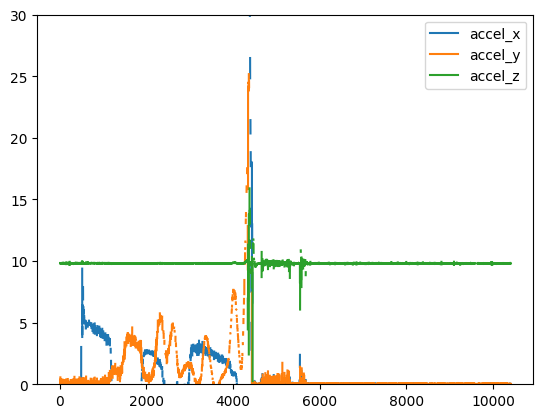

In [27]:
data = pd.read_csv('recordings/test.csv')

fig, ax = plt.subplots()
data[['accel_x', 'accel_y' , 'accel_z']].plot(ax=ax)
ax.set_ylim((0,30))

(4350.0, 4450.0)

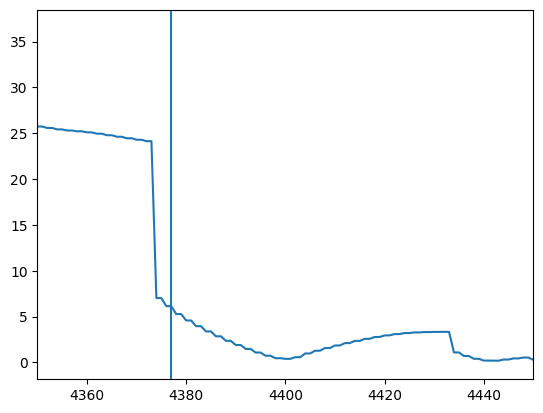

In [4]:
video_path = 'recordings/test.mp4'
# load_video_frame(video_path,1)
frames = get_total_frames(video_path)

%matplotlib inline

fig, ax = plt.subplots()
data.vehicle_speed.plot(x=' timestamp', ax=ax)
# ax.axvline(crash_frame)


# get tree crash
crash_ix = data[data.accel_x > 30].iloc[0].name
crash_frame = crash_ix // 2

ax.axvline(crash_ix)
ax.set_xlim((4350,4450))


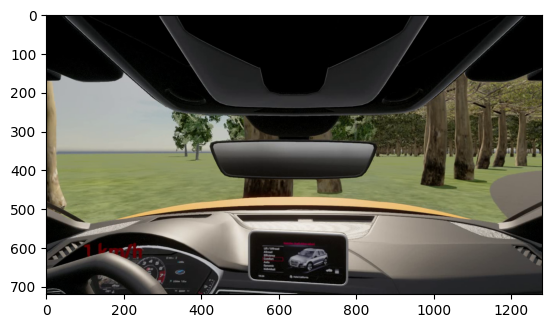

In [5]:
load_video_frame(video_path,crash_frame+12)